In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("dataset.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.info()
target_col = 'Target'            # đổi nếu tên khác


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


Target counts:


,count,proportion
Target,,
Graduate,2209,49.93
Dropout,1421,32.12
Enrolled,794,17.95


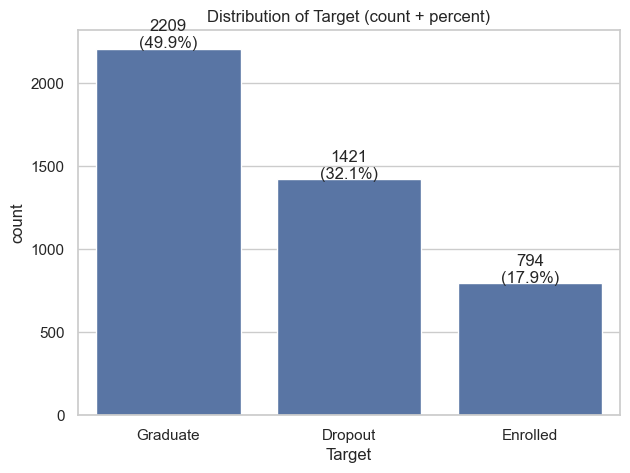

In [7]:

# 4. Target distribution (counts + %)
vc = df[target_col].value_counts()
vc_perc = df[target_col].value_counts(normalize=True)*100
print("Target counts:")
display(pd.concat([vc, vc_perc.round(2)], axis=1).rename(columns={0:"count", target_col:"percent"}))

plt.figure(figsize=(7,5))
ax = sns.countplot(x=target_col, data=df, order=vc.index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, f'{int(height)}\n({height/len(df):.1%})', ha="center")
plt.title("Distribution of Target (count + percent)")
plt.show()


### Nhận xét biểu đồ phân bố **Target**

- **Aspect – Class Imbalance**  
  Biểu đồ cho thấy có sự **mất cân bằng lớp (class imbalance)**.  
  Số lượng **Graduate** (sinh viên tốt nghiệp) chiếm nhiều nhất, cao hơn rõ rệt so với **Dropout** (sinh viên bỏ học) và **Enrolled** (sinh viên đang theo học).  

- **Description**  
  - Graduate: ~2200 sinh viên  
  - Dropout: ~1400 sinh viên  
  - Enrolled: ~800 sinh viên  

- **Implications**  
  - Sự mất cân bằng này có thể làm mô hình học máy **thiên lệch** về phía dự đoán nhóm đa số (Graduate).  
  - Nếu không xử lý, mô hình có thể đạt độ chính xác tổng thể cao nhưng **dự đoán kém** cho các lớp thiểu số (Dropout, Enrolled).  

- **Techniques to Address**  
  1. **Resampling**  
     - Oversampling các lớp thiểu số (Dropout, Enrolled).  
     - Undersampling lớp đa số (Graduate).  
  2. **Class Weights**  
     - Điều chỉnh trọng số trong mô hình để tăng tầm quan trọng của Dropout và Enrolled.  

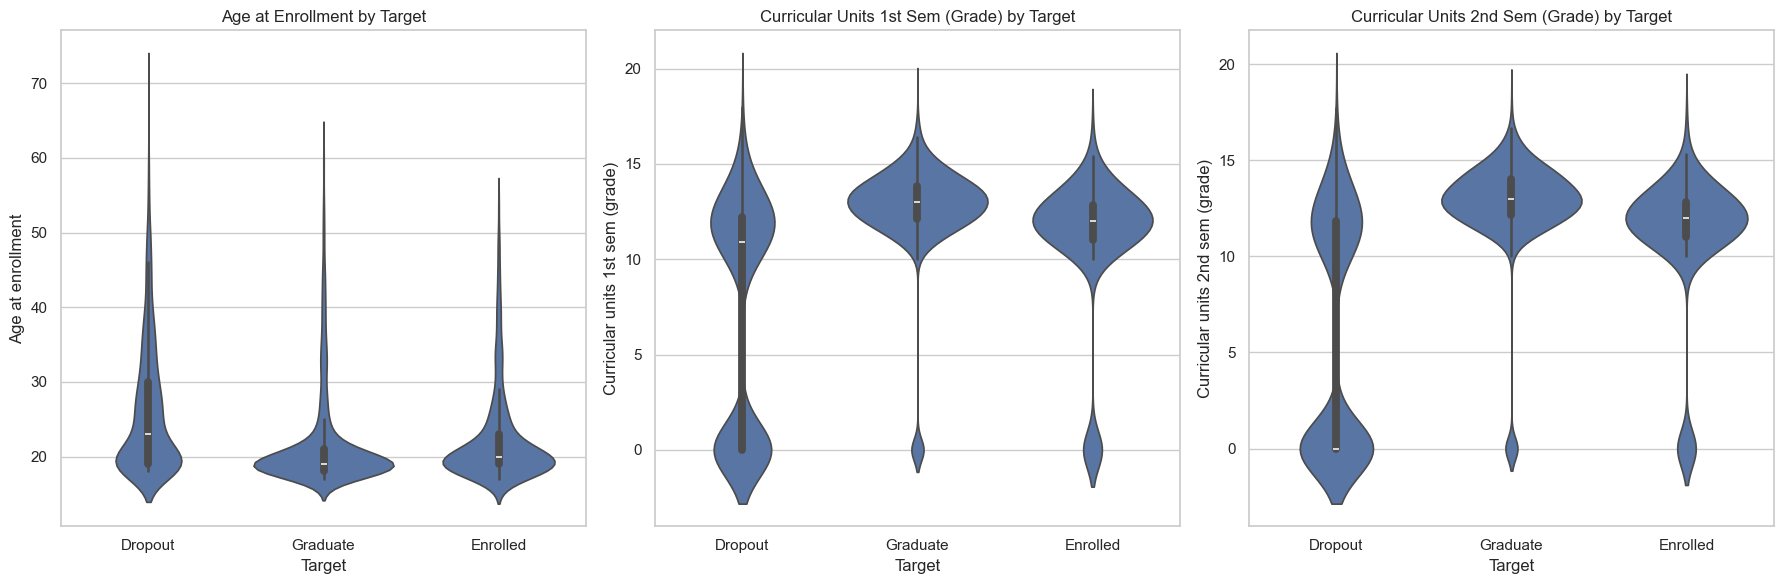

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot cho các đặc trưng
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Violin plot cho Age at enrollment
sns.violinplot(data=df, x='Target', y='Age at enrollment', ax=axes[0])
axes[0].set_title('Age at Enrollment by Target')

# Violin plot cho Curricular units 1st sem (grade)
sns.violinplot(data=df, x='Target', y='Curricular units 1st sem (grade)', ax=axes[1])
axes[1].set_title('Curricular Units 1st Sem (Grade) by Target')

# Violin plot cho Curricular units 2nd sem (grade)
sns.violinplot(data=df, x='Target', y='Curricular units 2nd sem (grade)', ax=axes[2])
axes[2].set_title('Curricular Units 2nd Sem (Grade) by Target')

plt.tight_layout()
plt.show()


### Nhận xét biểu đồ Pairplot (Age at enrollment, Curricular units 1st sem, Curricular units 2nd sem)

- **Graduates**  
  - Các điểm dữ liệu có **điểm đầu vào cao** thường đi kèm với **điểm cao ở học kỳ 1 và học kỳ 2**.  
  - Điều này cho thấy **mối tương quan dương** giữa điểm đầu vào và thành tích học tập, góp phần giúp sinh viên có khả năng tốt nghiệp.  

- **Dropouts**  
  - Nhiều điểm dữ liệu tập trung ở mức **điểm thấp hoặc bằng 0** trong học kỳ 1 và học kỳ 2.  
  - Điều này gợi ý rằng những sinh viên bỏ học thường gặp khó khăn trong chương trình, không theo kịp môn học hoặc có yếu tố khác tác động.  

- **Enrolled**  
  - Các điểm phân bố rải rác, chủ yếu nằm ở **mức trung bình** về điểm số.  
  - Nhóm này đang tiếp tục học, chưa có thành tích nổi bật nhưng vẫn còn khả năng cải thiện để hướng tới tốt nghiệp.  

---

In [9]:

# 5. Identify numeric & categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
if target_col in cat_cols:
    cat_cols.remove(target_col)
print("Numeric cols:", len(numeric_cols))
print("Categorical cols:", len(cat_cols))


Numeric cols: 34
Categorical cols: 0


,skewness
Educational special needs,9.154976
Curricular units 1st sem (without evaluations),8.207403
Nacionality,7.282730
Curricular units 2nd sem (without evaluations),7.267701
International,6.104830
Curricular units 2nd sem (credited),4.634820
Marital status,4.399764
Curricular units 1st sem (credited),4.169049
Father's occupation,4.058407
Debtor,2.434652


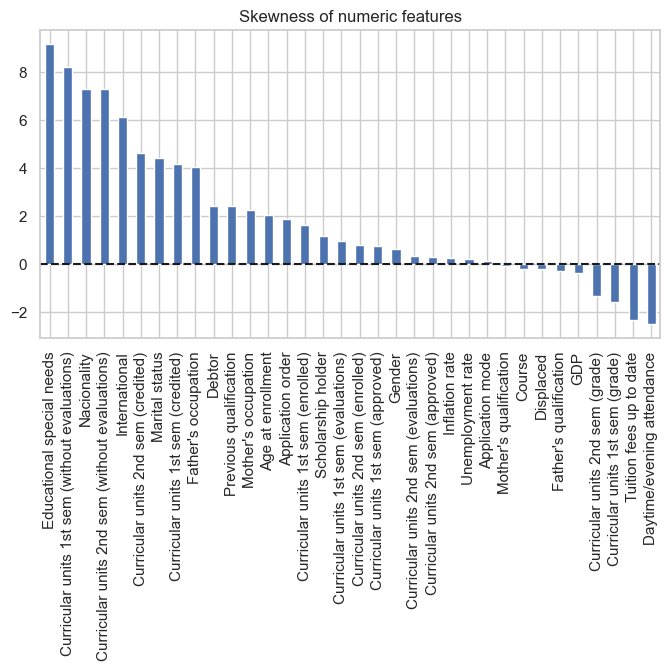

In [10]:

# 7. Skewness table (to decide transforms)
skewness = df[numeric_cols].skew().sort_values(ascending=False)
display(skewness.to_frame(name="skewness"))

plt.figure(figsize=(8,4))
skewness.plot.bar()
plt.axhline(0, color='k', linestyle='--')
plt.title("Skewness of numeric features")
plt.show()


Biến lệch phải mạnh (skewness cao dương):

Educational special needs, Curricular units (evaluations), Father’s occupation, Debtor, …

Điều này nghĩa là phần lớn sinh viên có giá trị thấp ở những biến này, chỉ một số ít có giá trị cao. Ví dụ, hầu hết sinh viên không có nhu cầu giáo dục đặc biệt, chỉ một vài có nhu cầu → dẫn đến skewness cao.

Biến gần chuẩn (skewness ≈ 0):

Application mode, Gender, Curricular units (approved) …

Những biến này phân phối dữ liệu cân đối, thuận lợi cho mô hình.

Biến lệch trái (skewness âm):

Tuition fees up to date, Daytime/evening attendance, Curricular units (grades), …

Tức là phần lớn sinh viên có giá trị cao, ít sinh viên có giá trị thấp. Ví dụ, nhiều sinh viên đóng học phí đúng hạn → dữ liệu nghiêng về phía cao.

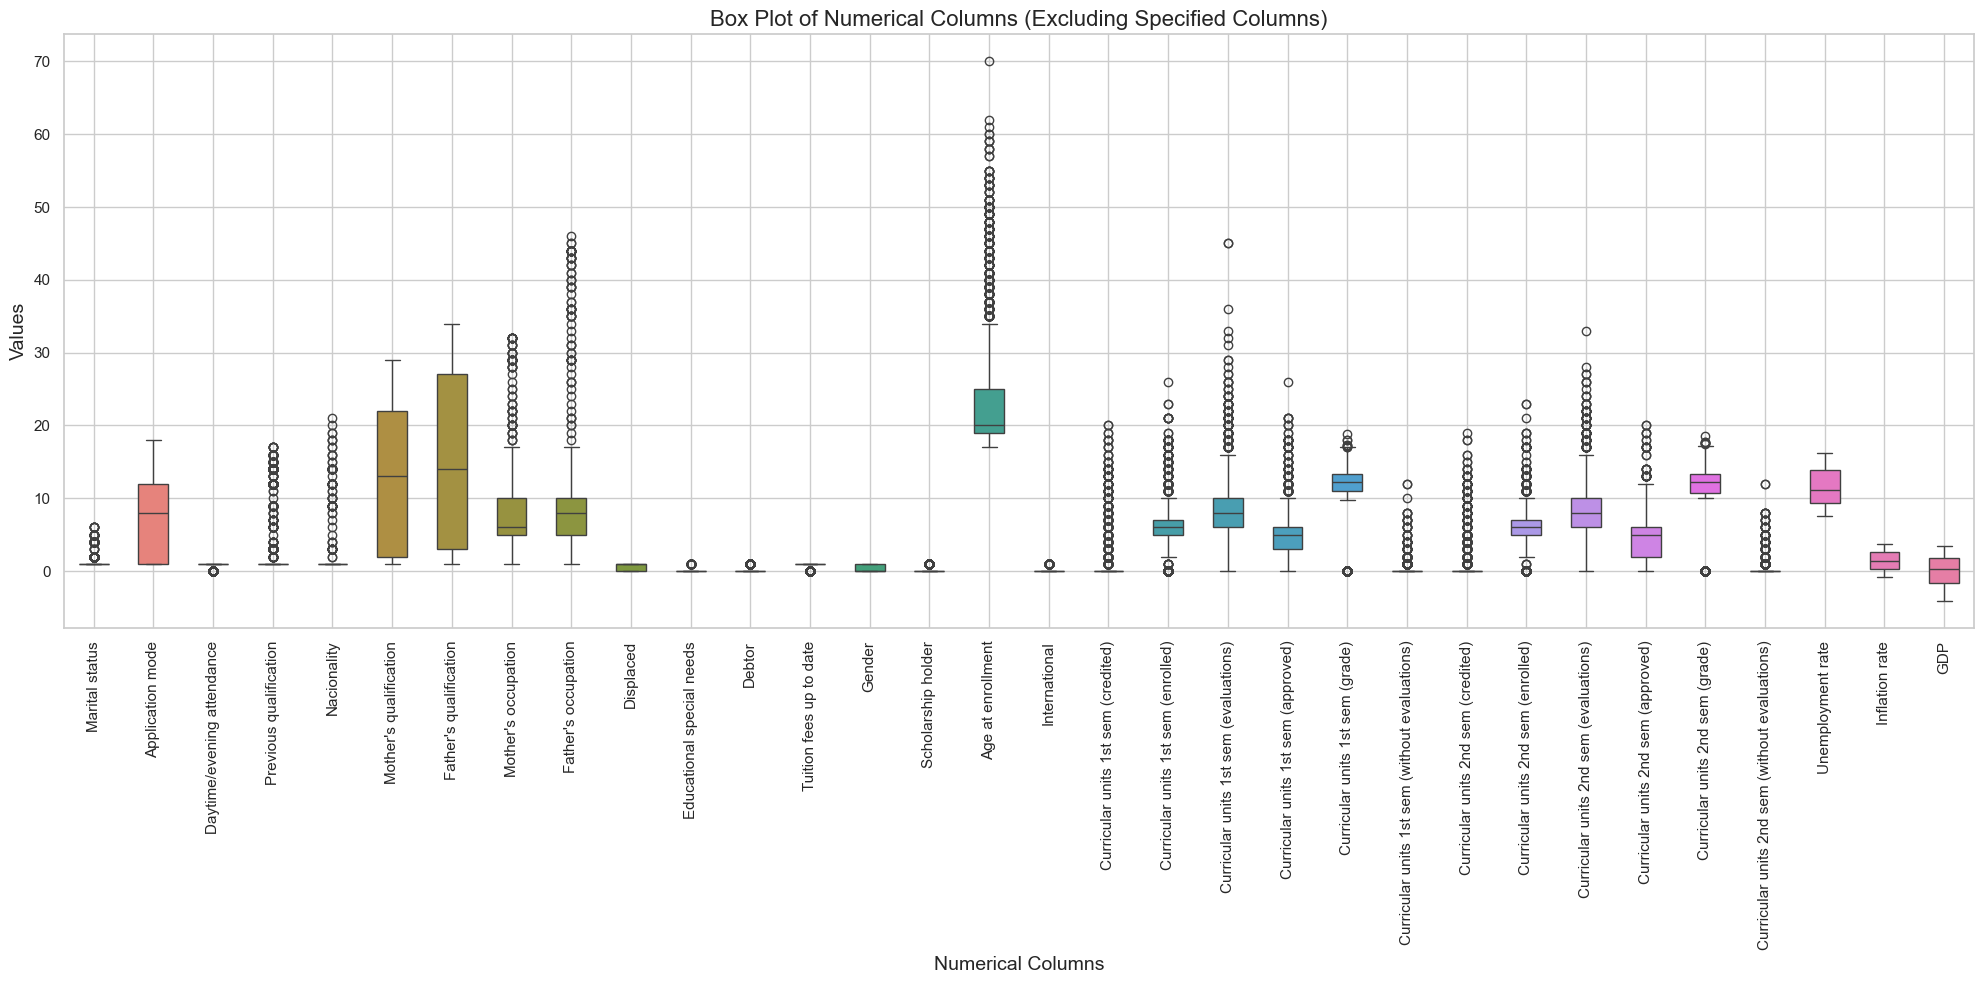

In [11]:
exclude_columns = ['Application order', 'Course']
numerical_cols = df.select_dtypes(include=['number']).drop(columns=exclude_columns).columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numerical_cols], orient='v', width=0.5)
plt.title('Box Plot of Numerical Columns (Excluding Specified Columns)', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Nhóm có độ lệch dương cao (skewness > 4):

Educational special needs, Curricular units (evaluations), Father’s occupation, Debtor…

Các biến này phân phối lệch phải mạnh → phần lớn dữ liệu tập trung ở giá trị thấp (gần 0), chỉ một số ít giá trị cao.

Ví dụ: hầu hết sinh viên không nợ học phí, không có nhu cầu đặc biệt, không nhiều môn bị đánh giá lại → dẫn đến skewness cao.

Nhóm có độ lệch dương vừa (skewness khoảng 1–4):

Previous qualification, Mother’s occupation, Age at enrollment…

Phân phối lệch phải nhưng ít hơn. Điều này cho thấy dữ liệu không cân đối hoàn toàn, có xu hướng nhiều giá trị thấp nhưng cũng có lượng đáng kể giá trị cao.

Nhóm gần chuẩn (skewness ≈ 0):

Application mode, Curricular units (enrolled/approved), Gender…

Phân phối khá cân bằng, dữ liệu phân bố đồng đều hơn → không cần biến đổi nhiều, có thể dùng trực tiếp trong mô hình.

Nhóm lệch trái (skewness < 0):

Tuition fees up to date, Curricular units (grades), Daytime/evening attendance…

Phần lớn sinh viên rơi vào giá trị cao (ví dụ: đóng học phí đầy đủ, điểm số cao, đa số học ban ngày).

Ít trường hợp rơi vào giá trị thấp → dữ liệu bị lệch về phía cao.

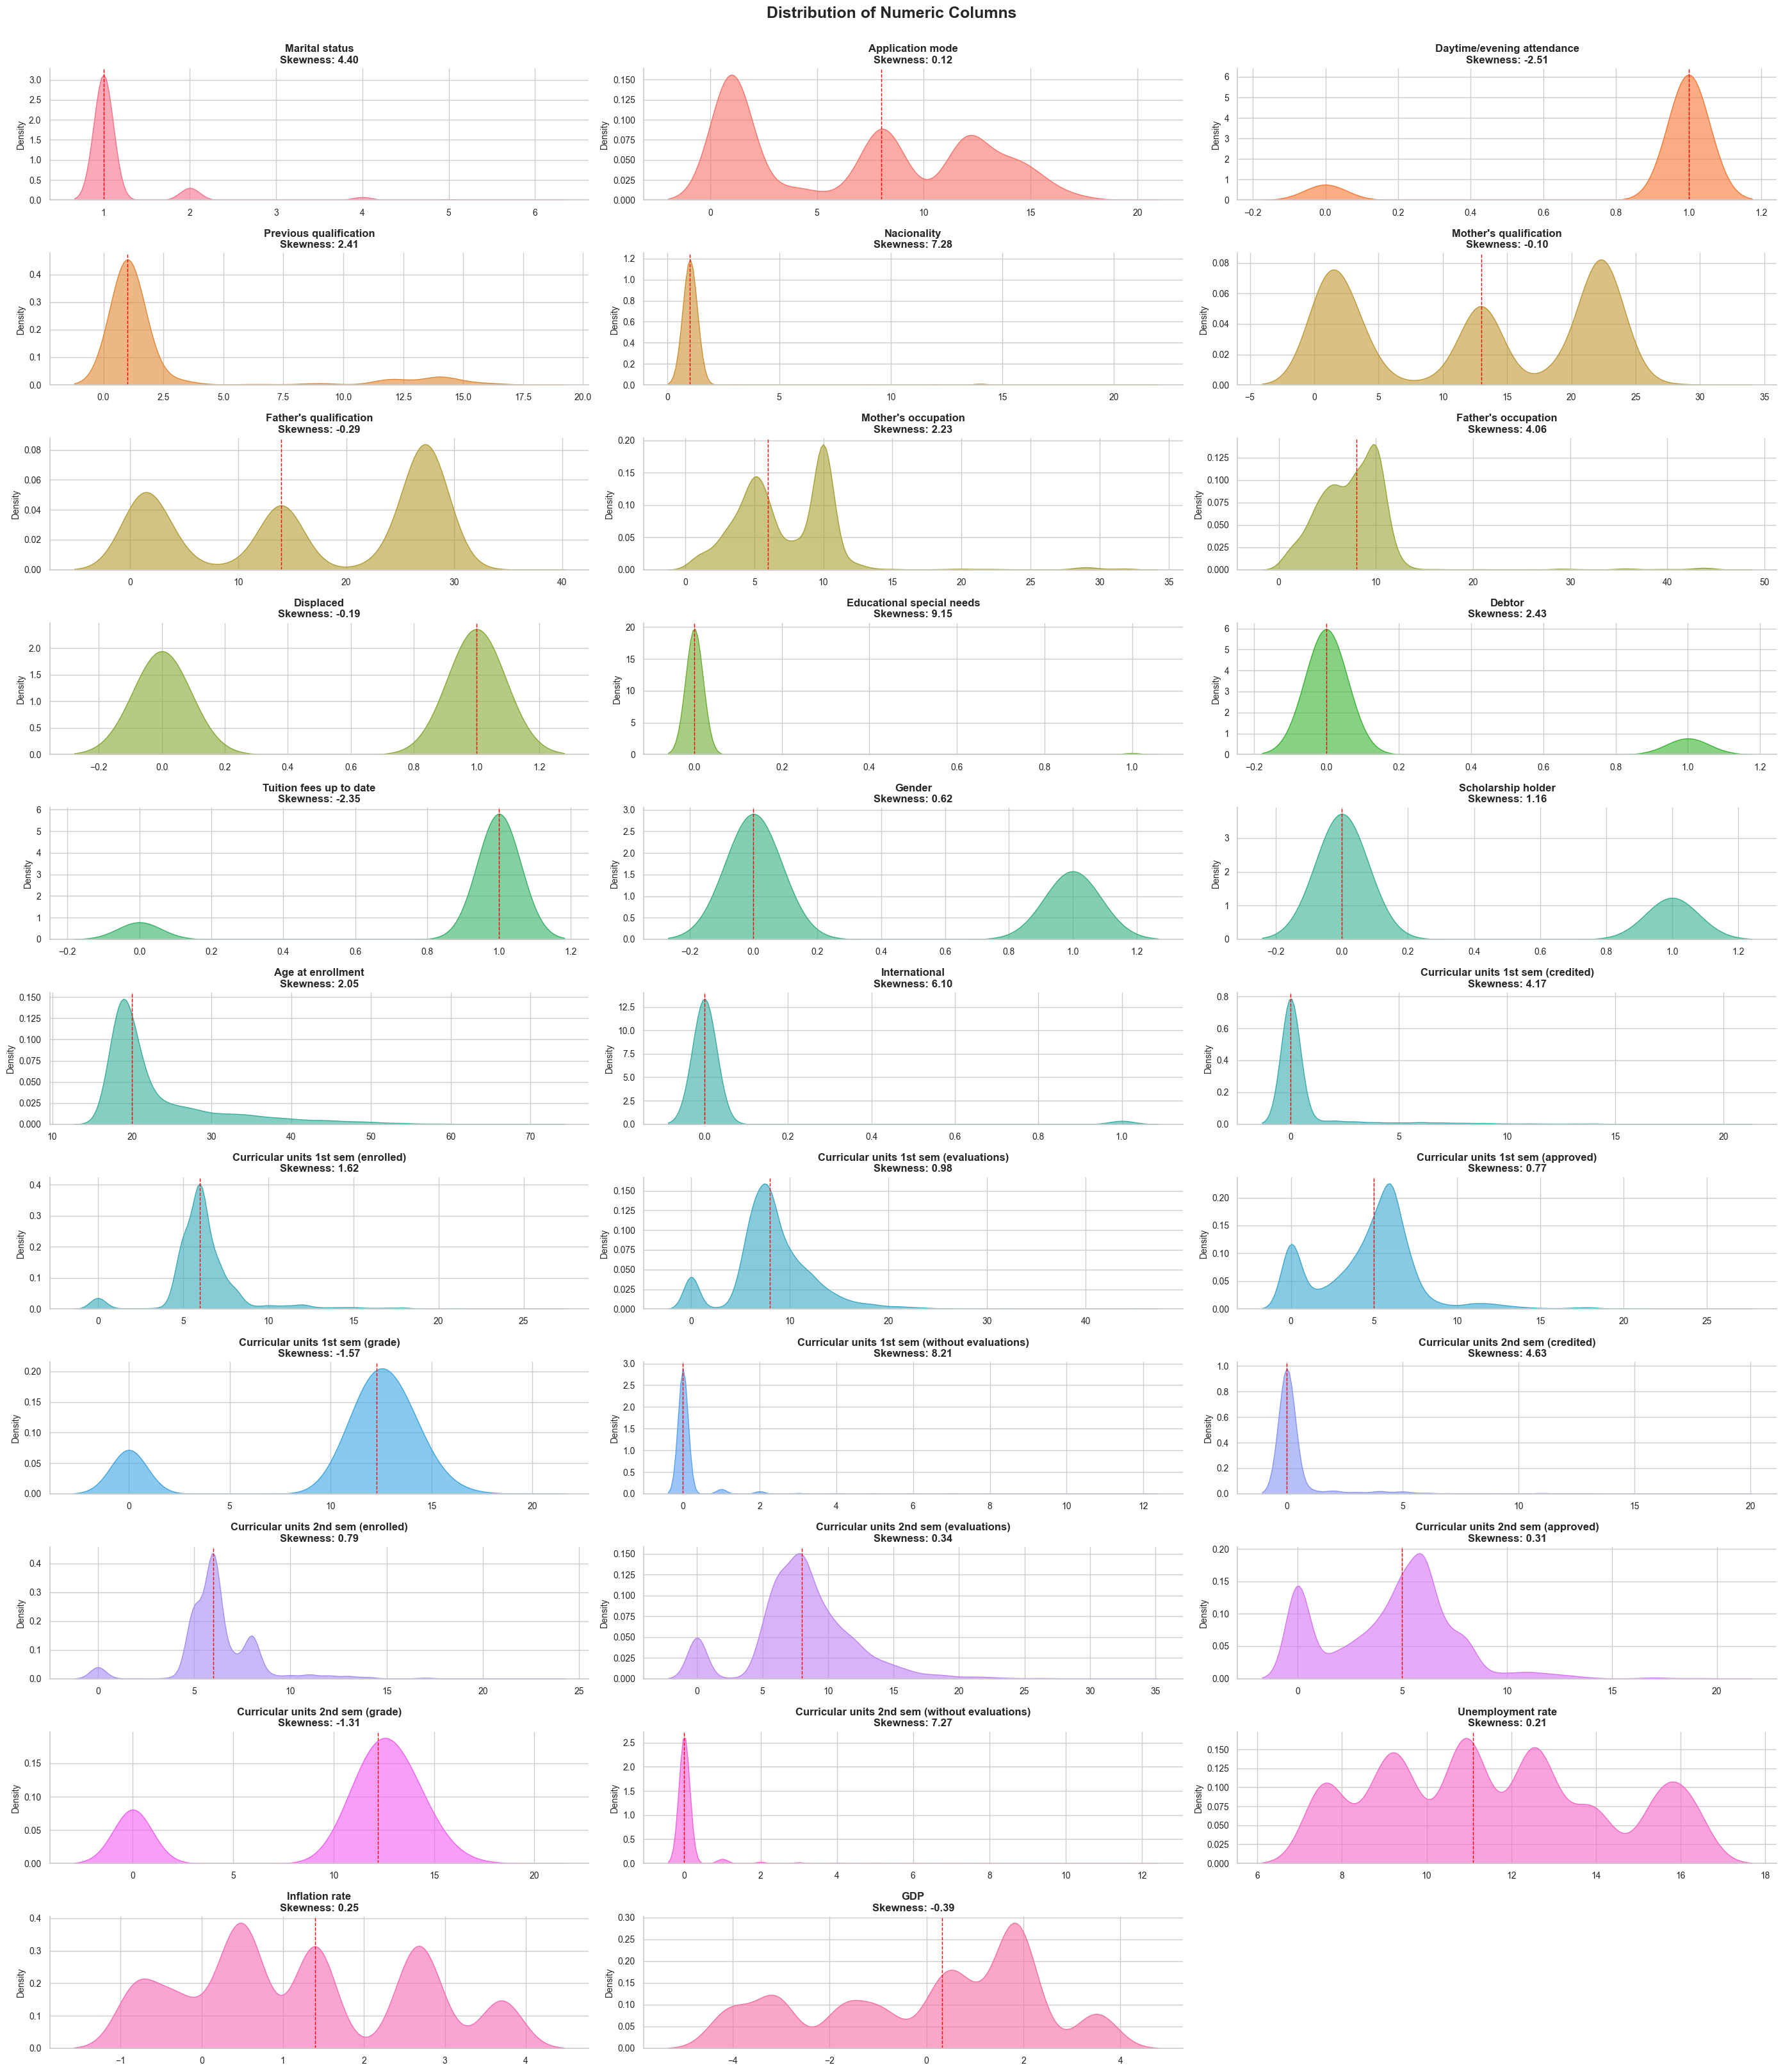

In [12]:
import math

def dist(train_dataset, columns_list, cols=3):
    columns_list = [col for col in columns_list if col != 'id']
    n = len(columns_list)
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(28, rows*3))  
    axs = axs.flatten()  

    palette = sns.color_palette("husl", len(columns_list))  

    for i, col in enumerate(columns_list):
        sns.kdeplot(train_dataset[col], ax=axs[i], fill=True, alpha=0.6, linewidth=1, color=palette[i])
        axs[i].set_title(f'{col}\nSkewness: {train_dataset[col].skew():.2f}', 
                         fontsize=12, fontweight="bold")
        axs[i].set_xlabel("")  
        axs[i].set_ylabel("Density", fontsize=10) 
        axs[i].tick_params(axis='both', which='major', labelsize=10)
        axs[i].axvline(train_dataset[col].median(), color='red', linestyle='--', linewidth=1)

    # xóa subplot thừa (nếu có)
    for j in range(len(columns_list), len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle('Distribution of Numeric Columns', fontsize=18, fontweight="bold")  
    plt.tight_layout(rect=[0, 0, 1, 0.98])  
    sns.despine()
    plt.show()
dist(train_dataset=df, columns_list=numerical_cols, cols=3)


### Nhận xét chi tiết phân phối các biến (Distribution + Skewness)

#### 1. Nhân khẩu học & thông tin cá nhân
- **Marital status (Skewness = 4.40)**: Phân bố lệch phải, đa số sinh viên chưa kết hôn. Các trạng thái khác rất ít xuất hiện → mất cân bằng.  
- **Nationality (Skewness = 7.28)**: Phân bố cực lệch phải, hầu hết sinh viên cùng một quốc tịch → dữ liệu thiếu đa dạng.  
- **Age at enrollment (Skewness = 2.05)**: Lệch phải, tập trung ở độ tuổi 18–22. Một số giá trị cao (30–60) là outliers.  
- **Gender (Skewness = 0.62)**: Tương đối cân bằng nhưng vẫn có một giới chiếm ưu thế hơn.  
- **International (Skewness = 6.10)**: Lệch mạnh, đa số sinh viên không thuộc diện quốc tế.  

👉 **Ý nghĩa**: Các biến này cho thấy mẫu sinh viên khá tập trung (quốc tịch, độ tuổi, tình trạng hôn nhân), cần xem xét gộp nhóm hoặc cân bằng dữ liệu.  

---

#### 2. Nền tảng học vấn và gia đình
- **Previous qualification (Skewness = 2.41)**: Một số loại bằng cấp chiếm đa số, nhiều loại hiếm gặp.  
- **Mother’s & Father’s qualification (Skewness ≈ -0.29; 3.12)**: Phân bố không đều, một số mức độ học vấn rất phổ biến.  
- **Mother’s & Father’s occupation (Skewness ≈ 2.23; 4.06)**: Phân bố lệch mạnh, một vài nhóm nghề nghiệp nổi bật hơn hẳn.  

👉 **Ý nghĩa**: Trình độ và nghề nghiệp của phụ huynh có thể ảnh hưởng tới thành tích học tập, nhưng dữ liệu không cân bằng làm giảm độ phân biệt.  

---

#### 3. Thông tin tài chính & hỗ trợ
- **Tuition fees up to date (Skewness = 2.35)**: Đa số sinh viên đóng học phí đúng hạn, rất ít trường hợp trễ hạn.  
- **Debtor (Skewness = 3.35)**: Lệch mạnh, đa phần sinh viên không nợ học phí.  
- **Scholarship holder (Skewness = 1.16)**: Chủ yếu không có học bổng, một tỷ lệ nhỏ được cấp học bổng.  

👉 **Ý nghĩa**: Các biến tài chính khá mất cân bằng, phản ánh thực tế chỉ một số ít sinh viên gặp khó khăn tài chính.  

---

#### 4. Biến học tập tại trường
- **Daytime/evening attendance (Skewness = -2.51)**: Lệch trái, đa số học ban ngày.  
- **Course (Skewness = -0.10)**: Phân bố khá đồng đều hơn so với các biến khác nhưng vẫn có ngành chiếm ưu thế.  
- **Educational special needs (Skewness = 91.5)**: Cực kỳ lệch, hầu hết sinh viên không có nhu cầu đặc biệt.  
- **Displaced (Skewness = 0.68)**: Tương đối cân bằng hơn nhưng vẫn thiên về nhóm không displaced.  

👉 **Ý nghĩa**: Một số biến (special needs) chứa rất ít dữ liệu có ích, có thể ít đóng góp cho mô hình.  

---

#### 5. Kết quả học tập (Curricular units & Grades)
- **Curricular units 1st sem (credited, enrolled, approved, evaluations, grade)**  
  - Skewness từ **0.77 đến 4.17**.  
  - Đa số sinh viên có số tín chỉ và điểm ở mức thấp–trung bình, một số ít có giá trị cao bất thường.  
- **Curricular units 2nd sem (tương tự)**: Kết quả tương đồng, skewness từ **-1.31 đến 7.27**.  

👉 **Ý nghĩa**: Đây là nhóm biến quan trọng nhất để dự báo. Tuy nhiên cần chuẩn hóa hoặc xử lý outliers để tránh ảnh hưởng mô hình.  

---

#### 6. Biến kinh tế vĩ mô
- **Unemployment rate (Skewness = 0.21)**: Phân bố khá đều, không quá lệch.  
- **Inflation rate (Skewness = 0.25)**: Phân bố chuẩn gần đối xứng.  
- **GDP (Skewness = -0.39)**: Phân bố gần chuẩn, hơi lệch trái nhẹ.  

👉 **Ý nghĩa**: Các biến này ổn định và có thể được giữ nguyên, không cần biến đổi nhiều.  

---

### Tổng kết chung
- Nhiều biến có **skewness cao** (Nationality, Educational special needs, International) → phân bố cực lệch, thông tin hạn chế.  
- Các biến học tập (Curricular units, Grades) chứa nhiều thông tin quan trọng nhưng có outliers → cần chuẩn hóa.  
- Biến vĩ mô (GDP, Inflation, Unemployment) phân bố tốt → có thể giữ nguyên.  
- Cần áp dụng các kỹ thuật xử lý skewness (log-transform, Box-Cox, resampling) và cân bằng dữ liệu để cải thiện hiệu quả mô hình.  


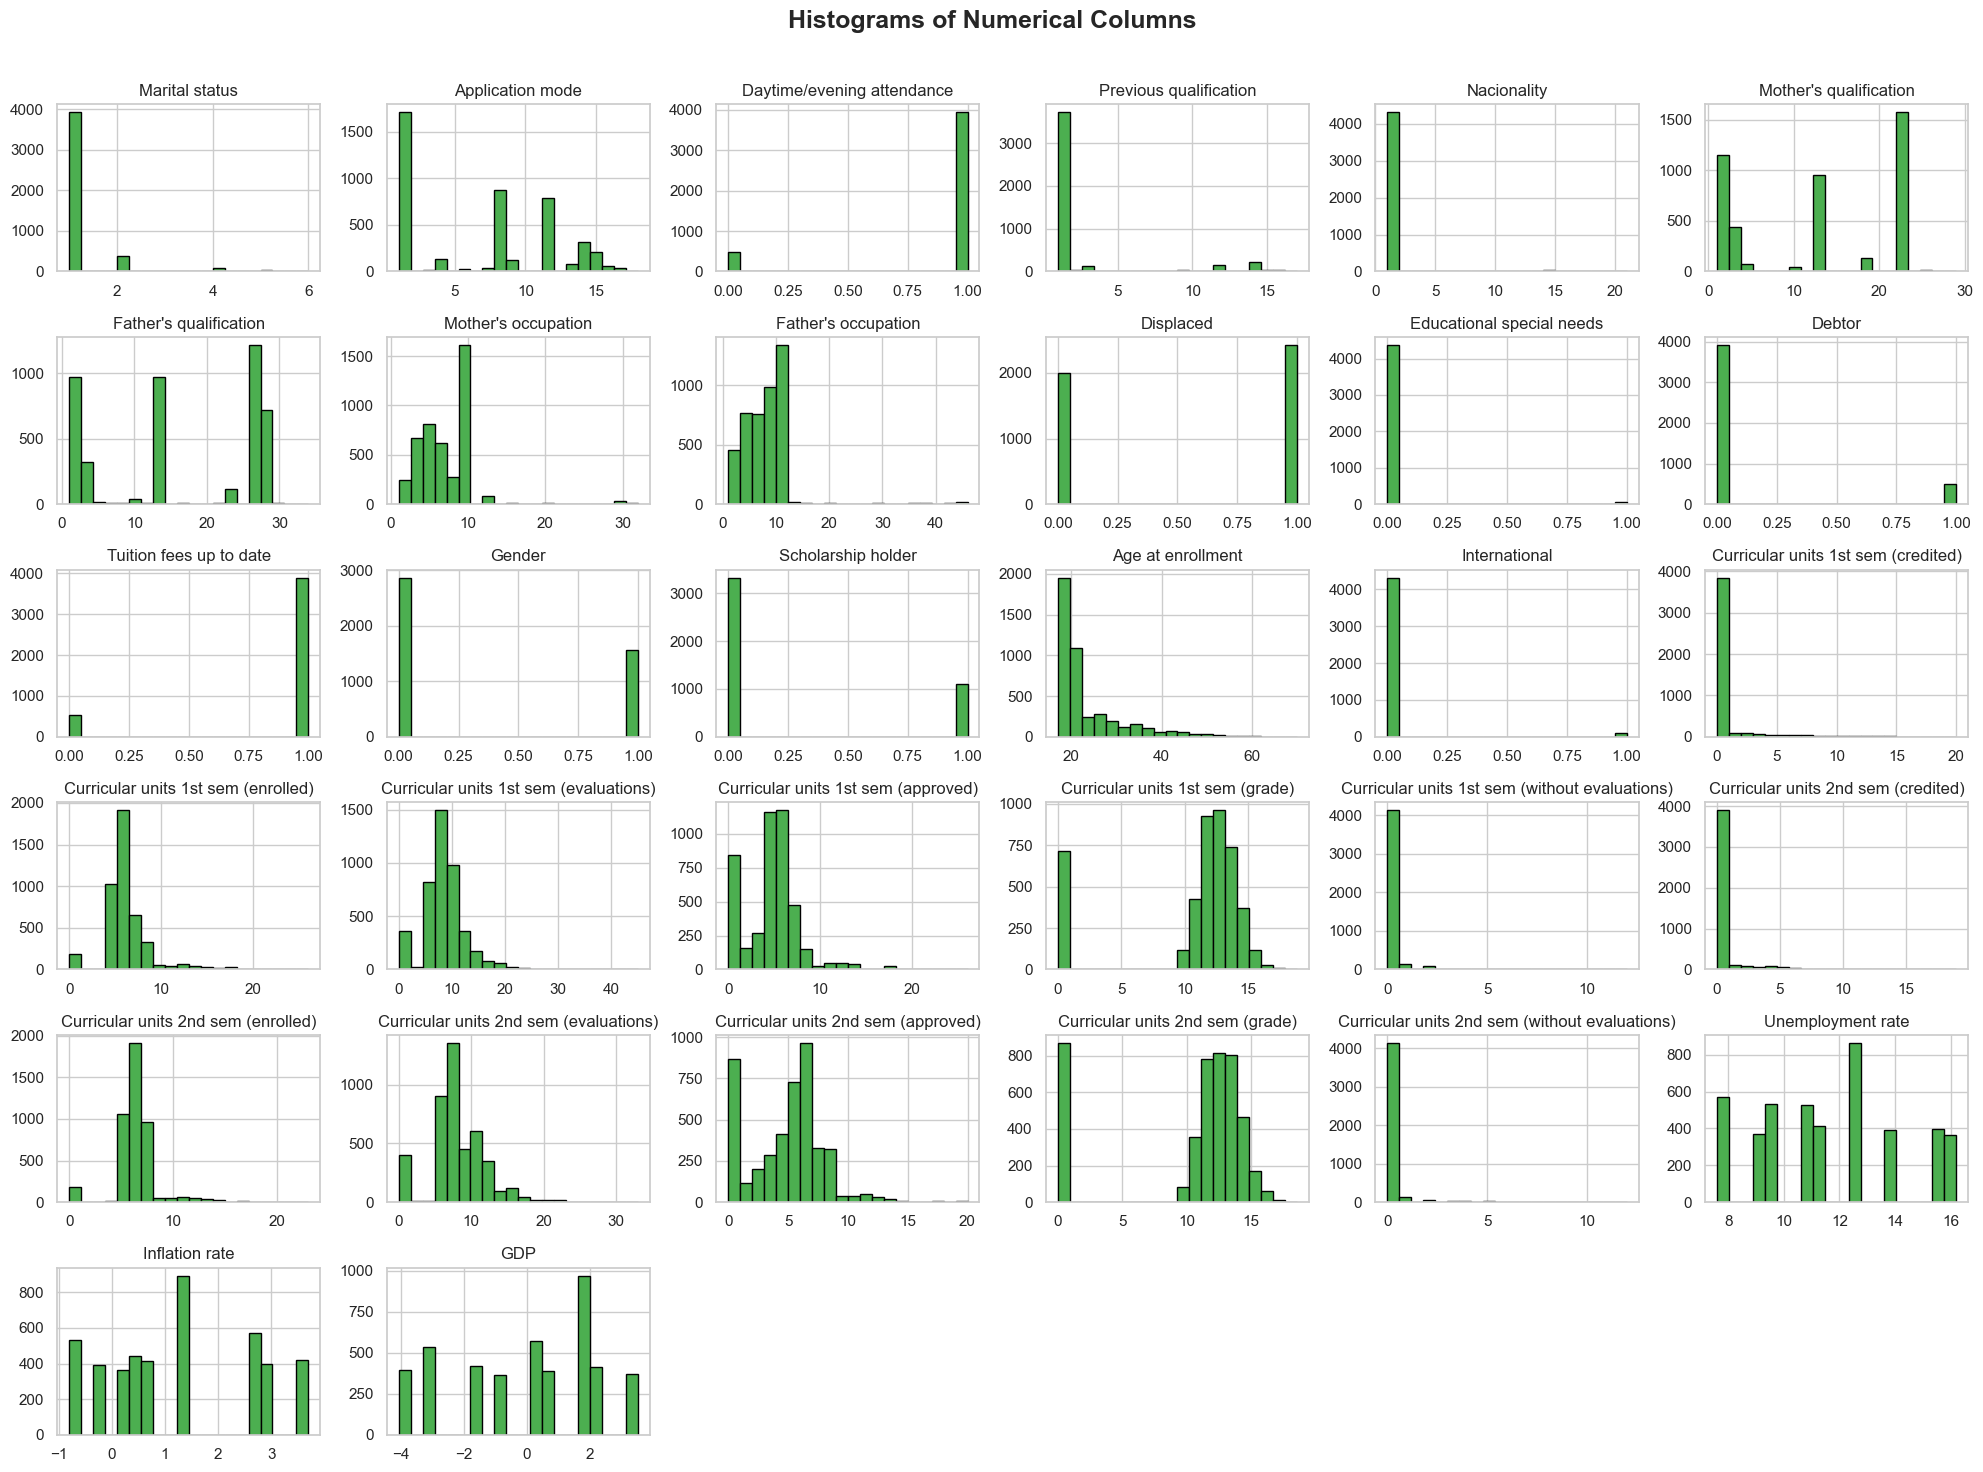

In [13]:
df[numerical_cols].hist(figsize=(20, 15), color='#4CAF50', edgecolor='black', bins=20)
plt.gcf().set_facecolor('white')
plt.suptitle("Histograms of Numerical Columns", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Nhận xét biểu đồ Histogram của các biến

#### 1. Biến nhân khẩu học (Demographics)
- **Marital status**: Đa số sinh viên chưa kết hôn (giá trị = 1). Các nhóm khác rất ít, gây mất cân bằng.  
- **Nationality**: Chủ yếu tập trung vào một vài quốc tịch → mất cân đối.  
- **Age at enrollment**: Phân bố lệch phải, tập trung mạnh ở độ tuổi 18–22, có một số outliers trên 30–60 tuổi.  
- **Gender**: Mất cân bằng, một giới chiếm ưu thế.  

**Nhận xét chung**: Các biến này cho thấy **sự tập trung mạnh vào một nhóm chính**, cần xử lý mất cân bằng hoặc gộp nhóm.

---

#### 2. Biến học tập trước khi nhập học
- **Previous qualification**: Một số loại bằng cấp xuất hiện rất nhiều, số còn lại hiếm.  
- **Mother’s & Father’s qualification**: Phân bố lệch, nhiều giá trị ít xuất hiện.  
- **Application mode & Application order**: Một số hình thức và thứ tự được chọn nhiều vượt trội so với các giá trị khác.  

**Nhận xét chung**: Các biến này chứa nhiều giá trị phân loại hiếm (low-frequency categories). Cần gộp nhóm hoặc loại bỏ để tránh noise.

---

#### 3. Biến học tập tại trường
- **Daytime/evening attendance**: Đa số học ban ngày.  
- **Course**: Một số ngành có số lượng sinh viên vượt trội, các ngành khác ít người chọn.  
- **Scholarship holder**: Phần lớn sinh viên không nhận học bổng.  
- **Tuition fees up to date**: Đa số sinh viên đóng học phí đúng hạn, rất ít không đúng hạn.  
- **Debtor**: Rất nhiều sinh viên không nợ học phí, số ít có nợ.  
- **Displaced, International, Educational special needs**: Đa số bằng 0 → rất ít sinh viên trong nhóm này.  

**Nhận xét chung**: Các biến này mất cân bằng nặng, chủ yếu tập trung vào một trạng thái (thường là 0 hoặc không có).  

---

#### 4. Biến học tập theo học kỳ
- **Curricular units 1st & 2nd sem (credited, enrolled, approved, grade)**:  
  - Phân bố lệch phải (đa số ở mức thấp đến trung bình).  
  - Số lần đăng ký, số tín chỉ đạt và điểm số đa phần rơi vào nhóm trung bình, ít có giá trị quá cao.  
- **Curricular units (evaluations, without evaluations)**: Chủ yếu sinh viên có ít lần đánh giá hoặc không có đánh giá.  

**Nhận xét chung**: Các biến này phản ánh rõ năng lực học tập → dữ liệu quan trọng để phân loại Dropout/Graduate. Tuy nhiên, có một số outliers (sinh viên đăng ký quá nhiều môn hoặc điểm bất thường).  

---

#### 5. Biến kinh tế vĩ mô
- **Unemployment rate, Inflation rate, GDP**:  
  - Phân bố gần như đồng đều.  
  - Không có cực trị rõ rệt.  

**Nhận xét chung**: Các biến này ổn định, không cần xử lý đặc biệt, nhưng có thể chỉ ảnh hưởng gián tiếp đến kết quả học tập.  

---

### Tổng kết
- **Mất cân bằng dữ liệu**: Nhiều biến tập trung mạnh vào một giá trị (ví dụ: Gender, Marital status, Debtor, Scholarship).  
- **Outliers**: Xuất hiện ở các biến như Age at enrollment, Curricular units (một số sinh viên có giá trị cực cao).  
- **Thông tin giá trị**: Các biến về học tập (Curricular units, Grades) và học phí (Debtor, Tuition fees up to date) mang nhiều thông tin dự báo cho mô hình.  


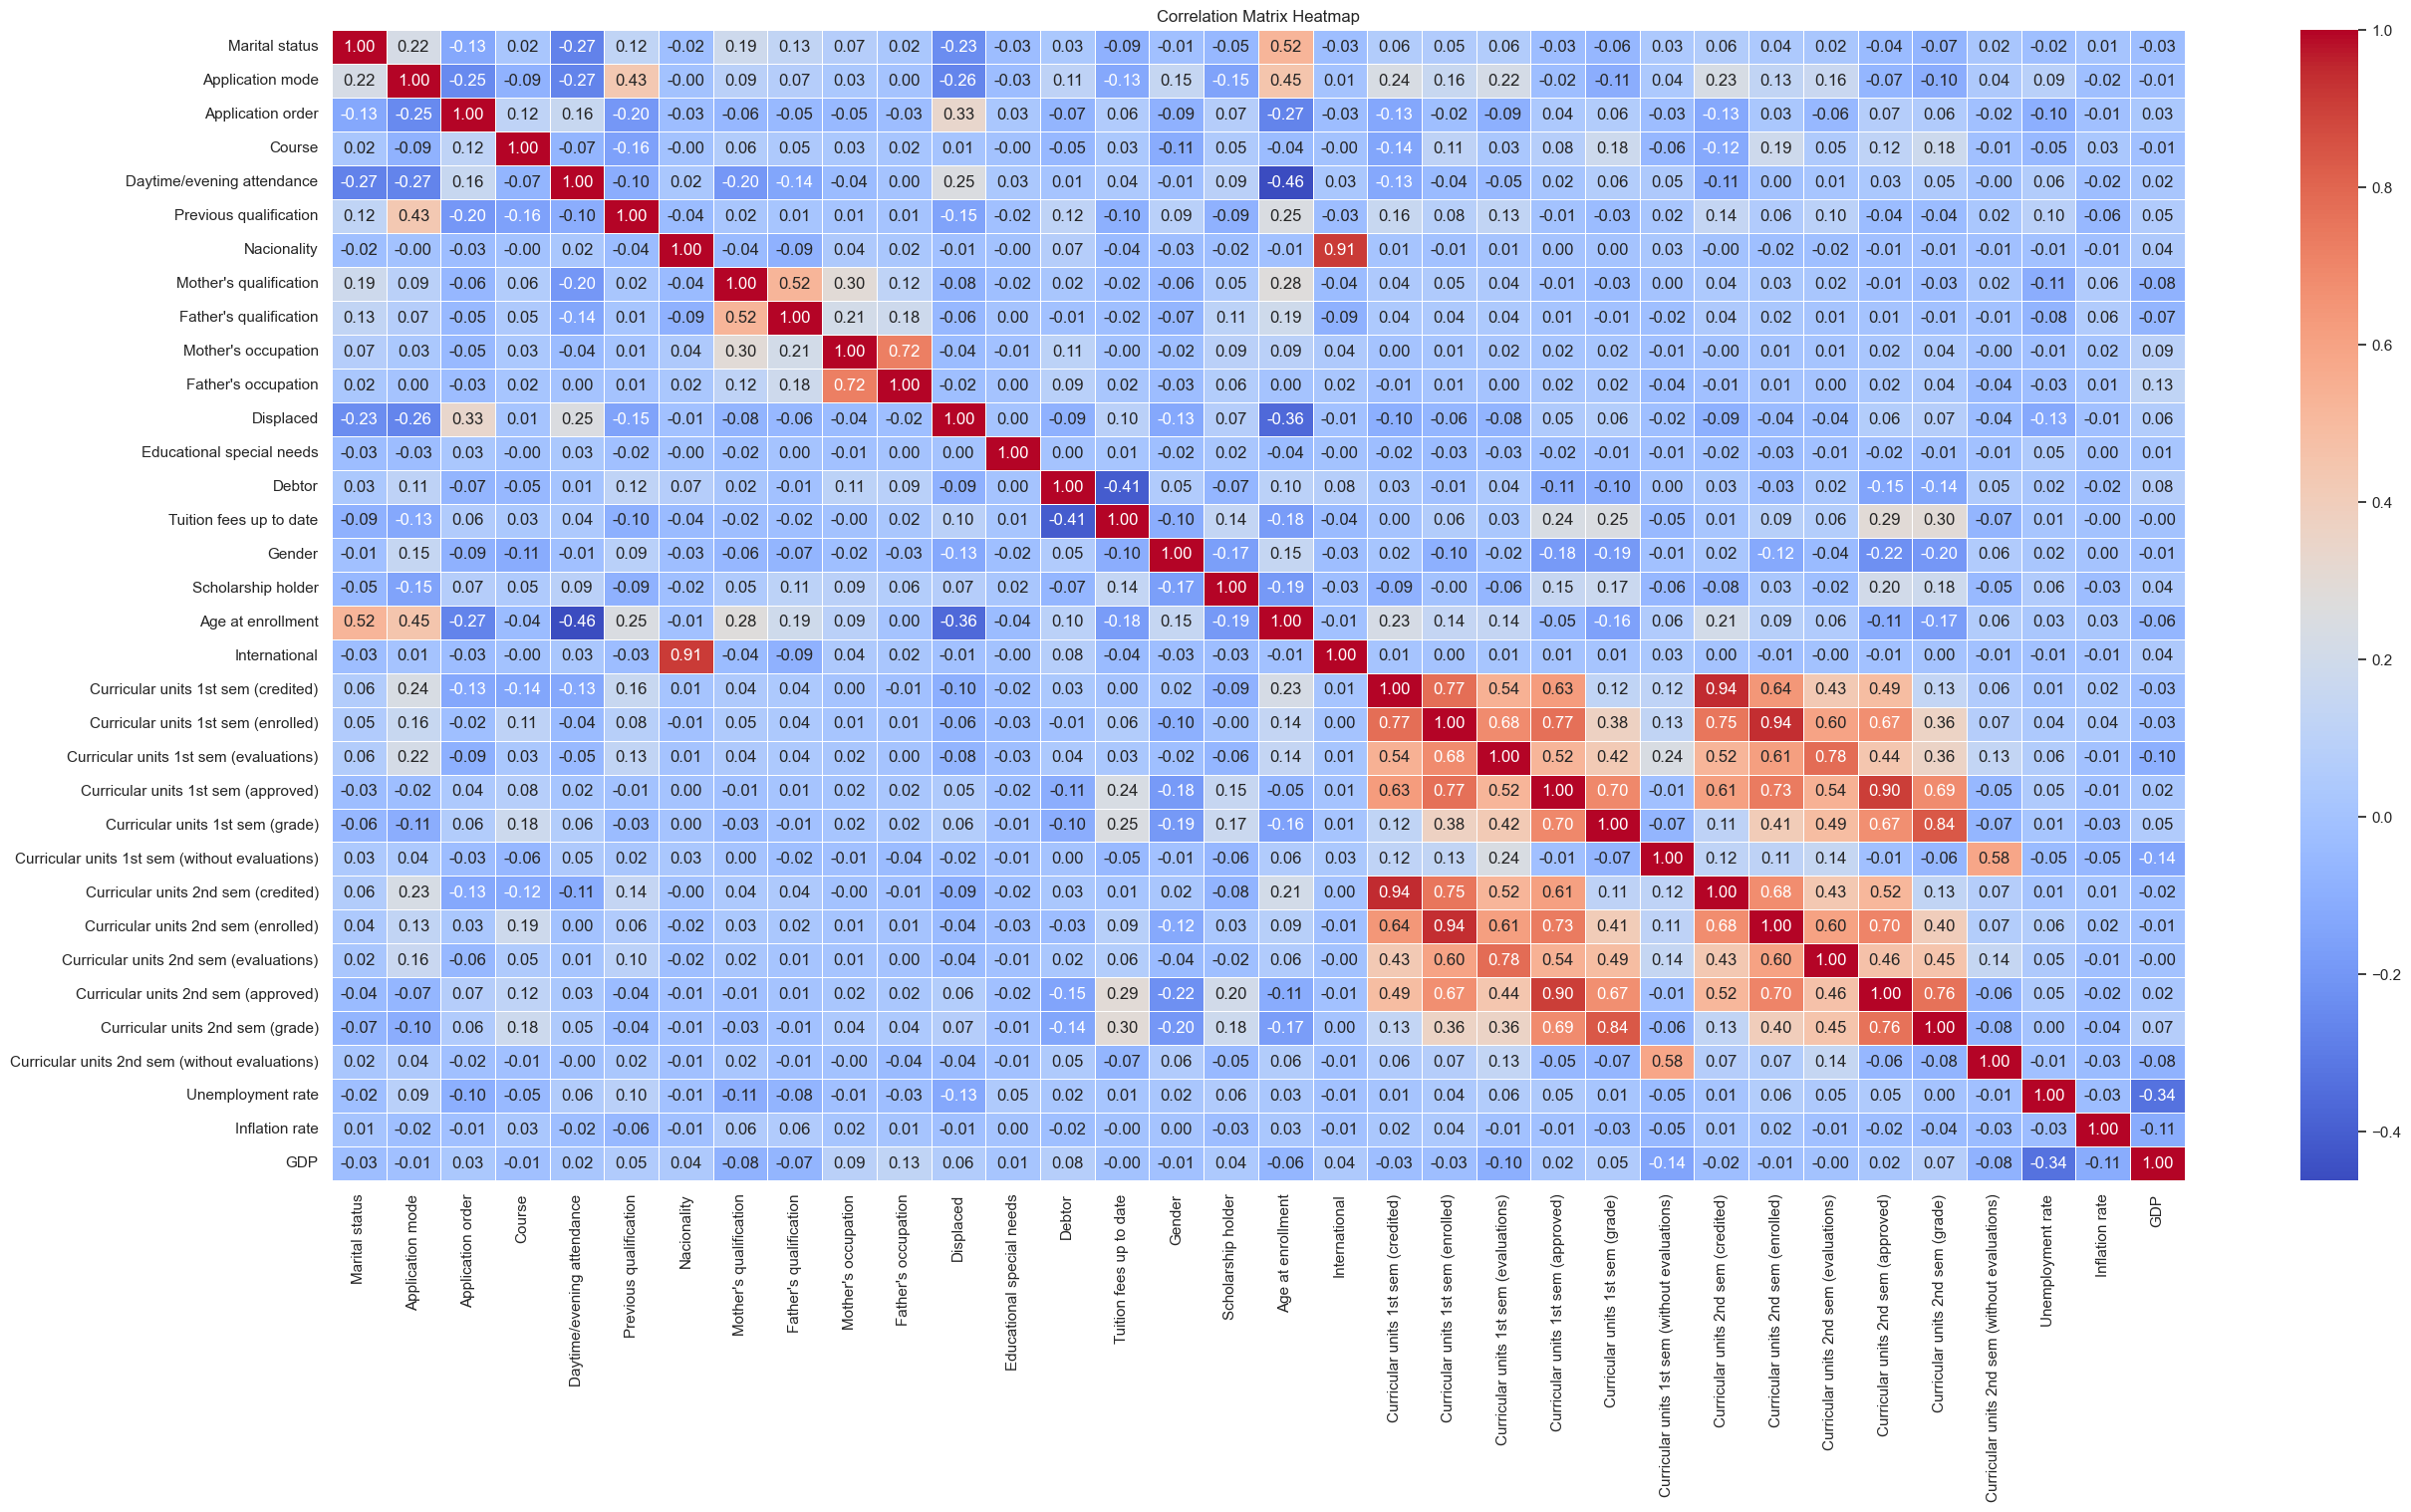

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chỉ lấy cột dạng số
numeric_df = df.select_dtypes(include=['number'])

# Ma trận tương quan
corr_matrix = numeric_df.corr()

# Vẽ heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7)

plt.title("Correlation Matrix Heatmap")
plt.show()


In [16]:

from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# === 2. Xử lý ngoại lệ (Outliers) ===
# Sử dụng RobustScaler (giảm ảnh hưởng của outliers)
scaler = RobustScaler()
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# === 3. Xử lý phân phối lệch (Skewness) ===
# Áp dụng Power Transformation (Yeo-Johnson) cho các biến lệch mạnh
pt = PowerTransformer(method='yeo-johnson')
df[num_cols] = pt.fit_transform(df[num_cols])

# === 4. Biến mục tiêu và gộp nhóm Success / Failure ===
df['Target'] = df['Target'].replace({'Graduate': 'Success', 'Enrolled': 'Success', 'Dropout': 'Failure'})

# === 5. Xử lý mất cân bằng lớp (Class imbalance) ===
X = df.drop(columns=['Target'])
y = df['Target']

# One-hot encoding trước khi SMOTE
X = pd.get_dummies(X, drop_first=True)

# Chia train/test trước khi oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Áp dụng SMOTE trên tập train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# === 6. Giảm đa cộng tuyến (Multicollinearity) ===
# PCA chỉ thực hiện khi cần giảm chiều (ví dụ giữ lại 95% phương sai)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test)

# === 7. Chuẩn hóa dữ liệu (Scaling) ===
# RobustScaler đã áp dụng ở bước đầu → không cần thêm StandardScaler
# Nếu dùng PCA thì dữ liệu đã được chuẩn hóa trước đó

print("Kích thước dữ liệu sau xử lý:")
print("X_train:", X_train_pca.shape, "y_train:", y_train_res.shape)
print("X_test:", X_test_pca.shape, "y_test:", y_test.shape)


Kích thước dữ liệu sau xử lý:
X_train: (4804, 25) y_train: (4804,)
X_test: (885, 25) y_test: (885,)


In [17]:
# === Import các thư viện cần thiết ===
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# === Logistic Regression ===
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_pca, y_train_res)

y_pred_log = log_reg.predict(X_test_pca)

print("==== Logistic Regression ====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


==== Logistic Regression ====
Accuracy: 0.8418079096045198
              precision    recall  f1-score   support

     Failure       0.74      0.77      0.76       284
     Success       0.89      0.88      0.88       601

    accuracy                           0.84       885
   macro avg       0.82      0.82      0.82       885
weighted avg       0.84      0.84      0.84       885



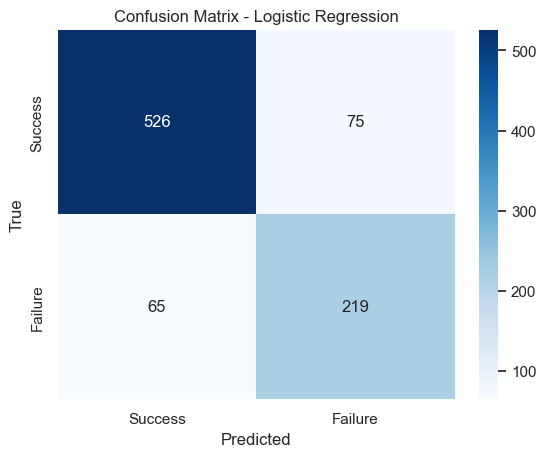

In [18]:

# Confusion Matrix Logistic
cm_log = confusion_matrix(y_test, y_pred_log, labels=["Success", "Failure"])
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=["Success", "Failure"], yticklabels=["Success", "Failure"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



In [19]:

# === Decision Tree ===
tree = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)
tree.fit(X_train_pca, y_train_res)

y_pred_tree = tree.predict(X_test_pca)

print("\n==== Decision Tree ====")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))



==== Decision Tree ====
Accuracy: 0.8214689265536723
              precision    recall  f1-score   support

     Failure       0.73      0.71      0.72       284
     Success       0.86      0.87      0.87       601

    accuracy                           0.82       885
   macro avg       0.80      0.79      0.79       885
weighted avg       0.82      0.82      0.82       885



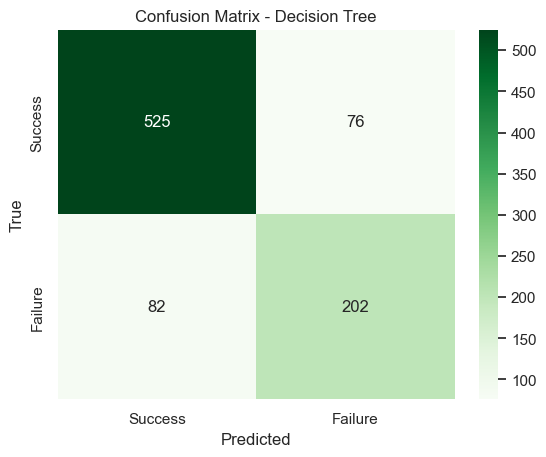

In [20]:

# Confusion Matrix Tree
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=["Success", "Failure"])
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens", xticklabels=["Success", "Failure"], yticklabels=["Success", "Failure"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
